## Churn Prediction using Logisitic Regression

## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

## Churn Prediction

* Importing data from MongoDB and making it ready to use it.
* Load Data & Packages for model building & preprocessing
* Preprocessing & Missing value imputation
* Select features on the basis of EDA Conclusions
* Decide Evaluation Metric on the basis of business problem
* Build model using all features 

# Loading Packages

In [56]:
import pymongo 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Importing data from MongoDB and making it ready to use it.

In [57]:
# Getting the access to local MongoDB databases
databases = pymongo.MongoClient()


In [58]:
ChurnData_db = databases.ChurnData

In [59]:

Churn_collection = ChurnData_db.Churn

In [60]:
Churn_collection.find_one({})

{'_id': ObjectId('62b8b66218553ebb5230253f'),
 'customer_id': '1',
 'vintage': '3135',
 'age': '66',
 'gender': 'Male',
 'dependents': '0',
 'occupation': 'self_employed',
 'city': '187',
 'customer_nw_category': '2',
 'branch_code': '755',
 'days_since_last_transaction': '224',
 'current_balance': '1458.71',
 'previous_month_end_balance': '1458.71',
 'average_monthly_balance_prevQ': '1458.71',
 'average_monthly_balance_prevQ2': '1449.07',
 'current_month_credit': '0.2',
 'previous_month_credit': '0.2',
 'current_month_debit': '0.2',
 'previous_month_debit': '0.2',
 'current_month_balance': '1458.71',
 'previous_month_balance': '1458.71',
 'churn': '0'}

### Loading Data

In [61]:
import pandas as pd
df = pd.DataFrame(list(Churn_collection.find({})))
df

,_id,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,62b8b66218553ebb5230253f,1,3135,66,Male,0,self_employed,187,2,755,...,1458.71,1458.71,1449.07,0.2,0.2,0.2,0.2,1458.71,1458.71,0
1,62b8b66218553ebb52302540,2,310,35,Male,0,self_employed,NaN,2,3214,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,62b8b66218553ebb52302541,4,2356,31,Male,0,salaried,146,2,41,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,62b8b66218553ebb52302542,5,478,90,NaN,NaN,self_employed,1020,2,582,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,62b8b66218553ebb52302543,6,2531,42,Male,2,self_employed,1494,3,388,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,62b8b66518553ebb52309418,30297,1845,10,Female,0,student,1020,2,1207,...,1076.43,2282.19,2787.7,0.3,0.3,0.3,0.3,1076.43,1076.43,0
28378,62b8b66518553ebb52309419,30298,4919,34,Female,0,self_employed,1046,2,223,...,4069.21,3668.83,3865.55,1.71,2.29,901,1014.07,3738.54,3690.32,0
28379,62b8b66518553ebb5230941a,30299,297,47,Male,0,salaried,1096,2,588,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.8,61078.5,57564.24,1
28380,62b8b66518553ebb5230941b,30300,2585,50,Male,3,self_employed,1219,3,274,...,1625.55,1683.2,1857.42,0.2,0.2,0.2,0.2,1625.55,1625.55,0


### Missing Values
Before we go on to build the model, we must look for missing values within the dataset as treating the missing values  is a necessary step before we fit a model on the dataset.

In [62]:
pd.isnull(df).sum()

_id                                  0
customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

## The result of this function shows that there are quite a few missing values in columns gender, dependents, city, and days since last transaction.  

## remove customer id and row number 

In [63]:
data_2 = df.iloc[:,2:]
data_2.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0,self_employed,187,2,755,224,1458.71,1458.71,1458.71,1449.07,0.2,0.2,0.2,0.2,1458.71,1458.71,0
1,310,35,Male,0,self_employed,NaN,2,3214,60,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,Male,0,salaried,146,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,NaN,NaN,self_employed,1020,2,582,147,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2,self_employed,1494,3,388,58,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [186]:
data_2.to_csv('30k.csv')

In [64]:
data_2['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

### So there is a good mix of males and females and arguably this attributes won't be the ones which affect the churn rate and it is clearly seen that gender is not the affecting attributes



## convert categorical variables into Numerical variables

In [65]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
data_2.replace({'gender': dict_gender}, inplace = True)

data_2['gender'] = data_2['gender'].fillna(-1)

C:\Users\Capricious\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
<ipython-input-65-133ceab5d70c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['gender'] = data_2['gender'].fillna(-1)


In [66]:
data_2['dependents'].value_counts()

0     21435
2      2150
1      1395
3       701
4       179
5        41
6         8
7         3
9         1
52        1
36        1
25        1
8         1
32        1
50        1
Name: dependents, dtype: int64

In [67]:
data_2['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

## Let us go through each of the columns with null value 1 by 1 to find the appropriate missing value imputation strategy for each of them.

### Dependents and city with mean
Next we will have a quick look at the dependents and city and we can see there are null values present in this attributes so as we want to make out dataset as accurate as it can be we removed the rows with null values in this two attributes.

In [68]:
data_2['dependents'] = data_2['dependents'].fillna(0)
data_2['occupation'] = data_2['occupation'].fillna('self_employed')

<ipython-input-68-c20524c9cfd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['dependents'] = data_2['dependents'].fillna(0)
<ipython-input-68-c20524c9cfd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['occupation'] = data_2['occupation'].fillna('self_employed')


In [69]:
data_2['city'] = data_2['city'].fillna(1020)

<ipython-input-69-db5641d933eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['city'] = data_2['city'].fillna(1020)


## Days since Last Transaction
 A fair assumption can be made on this column as this is number of days since last transaction the best solution is to put mean of the column in the form of integer to make the data set accurate.

In [70]:
data_2['days_since_last_transaction'] = data_2['days_since_last_transaction'].fillna(999)

<ipython-input-70-eec06acf8009>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['days_since_last_transaction'] = data_2['days_since_last_transaction'].fillna(999)


In [71]:
# Convert occupation to one hot encoded features
data_2 = pd.concat([data_2,pd.get_dummies(data_2['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [72]:
D=data_2.drop(['occupation'], axis = 1)

In [73]:
D.head()

,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,1.0,0,187,2,755,224,1458.71,1458.71,...,0.2,0.2,1458.71,1458.71,0,0,0,0,1,0
1,310,35,1.0,0,1020,2,3214,60,5390.37,8704.66,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,2356,31,1.0,0,146,2,41,999,3913.16,5815.29,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,478,90,-1.0,0,1020,2,582,147,2291.91,2291.91,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,2531,42,1.0,2,1494,3,388,58,927.72,1401.72,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [74]:
df2 = D.T.drop_duplicates().T

In [75]:
df2.head()

,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,1.0,0,187,2,755,224,1458.71,1458.71,...,0.2,0.2,1458.71,1458.71,0,0,0,0,1,0
1,310,35,1.0,0,1020,2,3214,60,5390.37,8704.66,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,2356,31,1.0,0,146,2,41,999,3913.16,5815.29,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,478,90,-1.0,0,1020,2,582,147,2291.91,2291.91,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,2531,42,1.0,2,1494,3,388,58,927.72,1401.72,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


## get correlation with other variables:

In [76]:

data_corr = df2.astype('float64').corr()
data_corr


,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
vintage,1.000000,0.227390,0.067497,0.068588,0.041720,-0.167366,-0.380714,-0.034482,0.002986,0.004518,...,0.005406,0.023949,0.001638,0.003448,-0.064637,0.035027,0.057813,0.041924,-0.013189,-0.106399
age,0.227390,1.000000,-0.078590,0.001261,0.014564,-0.076532,-0.058990,-0.020005,0.054346,0.058342,...,0.027702,0.033296,0.057662,0.060297,-0.020012,0.045605,0.372942,-0.129008,0.153136,-0.452218
gender,0.067497,-0.078590,1.000000,0.185064,0.000875,0.070755,0.072436,-0.066755,-0.021541,-0.020930,...,0.003392,0.009899,-0.021557,-0.020782,0.015938,-0.001028,0.126237,0.168030,-0.198752,-0.028061
dependents,0.068588,0.001261,0.185064,1.000000,0.003287,0.007917,-0.001704,-0.088345,-0.003838,-0.002181,...,0.008225,0.030746,-0.002769,-0.001672,0.029335,-0.004590,-0.054831,0.044848,0.037310,-0.088262
city,0.041720,0.014564,0.000875,0.003287,1.000000,0.009323,-0.055779,-0.004962,-0.006220,-0.004634,...,0.001231,0.005448,-0.006355,-0.006318,-0.000883,0.002009,-0.004232,0.003649,0.000163,-0.002373
customer_nw_category,-0.167366,-0.076532,0.070755,0.007917,0.009323,1.000000,0.235059,0.025655,-0.058314,-0.059854,...,-0.035917,-0.071721,-0.058648,-0.059113,0.006551,0.002814,0.011718,0.040449,-0.021901,-0.037264
branch_code,-0.380714,-0.058990,0.072436,-0.001704,-0.055779,0.235059,1.000000,-0.022233,0.000181,0.000214,...,-0.016944,-0.017584,0.001031,0.002080,0.035469,-0.008184,-0.004395,-0.033180,0.053324,-0.039988
days_since_last_transaction,-0.034482,-0.020005,-0.066755,-0.088345,-0.004962,0.025655,-0.022233,1.000000,-0.016093,-0.014230,...,-0.032064,-0.061362,-0.015731,-0.013177,-0.096500,0.004372,0.002313,-0.042554,-0.017372,0.099309
current_balance,0.002986,0.054346,-0.021541,-0.003838,-0.006220,-0.058314,0.000181,-0.016093,1.000000,0.947276,...,0.044412,0.081247,0.983412,0.942207,-0.024181,0.000772,-0.006112,0.000760,0.012773,-0.019217
previous_month_end_balance,0.004518,0.058342,-0.020930,-0.002181,-0.004634,-0.059854,0.000214,-0.014230,0.947276,1.000000,...,0.066329,0.109606,0.974714,0.969605,0.006886,-0.001113,-0.005698,-0.001456,0.014918,-0.019741


<AxesSubplot:>

<Figure size 2880x2880 with 0 Axes>

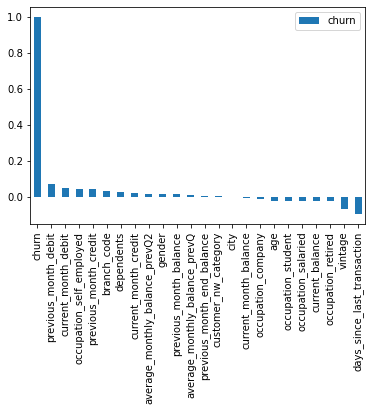

In [77]:
plt.figure(figsize = (40,40))
data_corr[['churn']].sort_values(by='churn', ascending = False).plot(kind='bar')

### Observastion result
Based on correlation bar plot, we can conclude that:

Previous_month_debit, current_month_debit, previous_month_credit to be positively correlated with Churn. While Vintage, days_since_last_transaction. age, current balance are negatively corelated with Churn.

That's quite interesting that Current_balance and age is negatively correlated with Churn.

We need to more explore with the dataset!

## Data Exploration
### data exploration helps to understand the patterns in the data and potentially form some hypothesis.

## A).Demographic
### Understanding variable Age, Gender_male,Gender_Female, Credit, and Debit

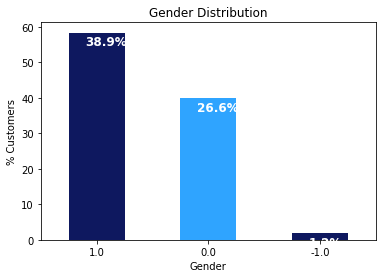

In [78]:
colors = ['#0E185F','#2FA4FF']
ax = (df2['gender'].value_counts()*100.0/len(df2)).plot(kind='bar', stacked = True,
                                                                          rot = 0,
                                                                          color = colors)

ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

#create a list to collect the plt.patches data
total = []

#find the values and append to list
for i in ax.patches:
    total.append(i.get_width())

#set individual bar labels using above list
totals = sum(total)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
           str(round((i.get_height()/totals), 1))+ '%',
           fontsize=12,
           color = 'white',
           weight = 'bold')


In [79]:
df2.columns

Index(['vintage', 'age', 'gender', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'occupation_company',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student'],
      dtype='object')

In [81]:
df2.columns

Index(['vintage', 'age', 'gender', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'occupation_company',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student'],
      dtype='object')

In [82]:
df2.head()

,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,1.0,0,187,2,755,224,1458.71,1458.71,...,0.2,0.2,1458.71,1458.71,0,0,0,0,1,0
1,310,35,1.0,0,1020,2,3214,60,5390.37,8704.66,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,2356,31,1.0,0,146,2,41,999,3913.16,5815.29,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,478,90,-1.0,0,1020,2,582,147,2291.91,2291.91,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,2531,42,1.0,2,1494,3,388,58,927.72,1401.72,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [122]:
df2.to_csv('data30kclean.csv')

### Preprocessing

Now, before applying linear model such as logistic regression, we need to scale the data and keep all features as numeric strictly. 


### Scaling Numerical Features for Logistic Regression

Now, we remember that there are a lot of outliers in the dataset especially when it comes to previous and current balance features. Also, the distributions are skewed for these features. We will take 2 steps to deal with that here:
* Log Transformation
* Standard Scaler

Standard scaling is anyways a necessity when it comes to linear models and we have done that here after doing log transformation on all balance features.

In [83]:
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']




In [85]:
std = StandardScaler()
scaled = std.fit_transform(df2[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [86]:
df_df_og = df2.copy()
ddf = df2.drop(columns = num_cols,axis = 1)
ddf = df2.merge(scaled,left_index=True,right_index=True,how = "left")

In [87]:
ddf.columns

Index(['vintage', 'age', 'gender', 'dependents', 'city',
       'customer_nw_category_x', 'branch_code', 'days_since_last_transaction',
       'current_balance_x', 'previous_month_end_balance_x',
       'average_monthly_balance_prevQ_x', 'average_monthly_balance_prevQ2_x',
       'current_month_credit_x', 'previous_month_credit_x',
       'current_month_debit_x', 'previous_month_debit_x',
       'current_month_balance_x', 'previous_month_balance_x', 'churn',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student',
       'customer_nw_category_y', 'current_balance_y',
       'previous_month_end_balance_y', 'average_monthly_balance_prevQ2_y',
       'average_monthly_balance_prevQ_y', 'current_month_credit_y',
       'previous_month_credit_y', 'current_month_debit_y',
       'previous_month_debit_y', 'current_month_balance_y',
       'previous_month_balance_y'],
      dtype='object')

In [88]:
y_all = df.churn
ddf = ddf.drop(['churn'],axis = 1)

## Model Building and Evaluation Metrics


### Conclusions from EDA
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
* For all the balance features the lower values have much higher proportion of churning customers
* For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 
* We see significant difference for different occupations and certainly would be interesting to use as a feature for prediction of churn.
Now, we will first split our dataset into test and train and using the above conclusions select columns and build a baseline logistic regression model to check  the confusion matrix

### Baseline Columns

In [89]:
ddf.columns


Index(['vintage', 'age', 'gender', 'dependents', 'city',
       'customer_nw_category_x', 'branch_code', 'days_since_last_transaction',
       'current_balance_x', 'previous_month_end_balance_x',
       'average_monthly_balance_prevQ_x', 'average_monthly_balance_prevQ2_x',
       'current_month_credit_x', 'previous_month_credit_x',
       'current_month_debit_x', 'previous_month_debit_x',
       'current_month_balance_x', 'previous_month_balance_x',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student',
       'customer_nw_category_y', 'current_balance_y',
       'previous_month_end_balance_y', 'average_monthly_balance_prevQ2_y',
       'average_monthly_balance_prevQ_y', 'current_month_credit_y',
       'previous_month_credit_y', 'current_month_debit_y',
       'previous_month_debit_y', 'current_month_balance_y',
       'previous_month_balance_y'],
      dtype='object')

In [90]:
baseline_cols = ['current_month_debit_y', 'previous_month_debit_y','current_balance_y','previous_month_end_balance_y','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [91]:
df_baseline = ddf[baseline_cols]

In [163]:
df_baseline.head(2)

,current_month_debit_y,previous_month_debit_y,current_balance_y,previous_month_end_balance_y,vintage,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,-0.070378,-0.137427,-0.139017,-0.141953,3135,0,0,1,0
1,0.035155,-0.133297,-0.046720,0.028425,310,0,0,1,0


### Train Test Split to create a validation set

In [92]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [158]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]
pred

array([0.21192047, 0.19546531, 0.15360868, ..., 0.19256688, 0.18565982,
       0.13563011])

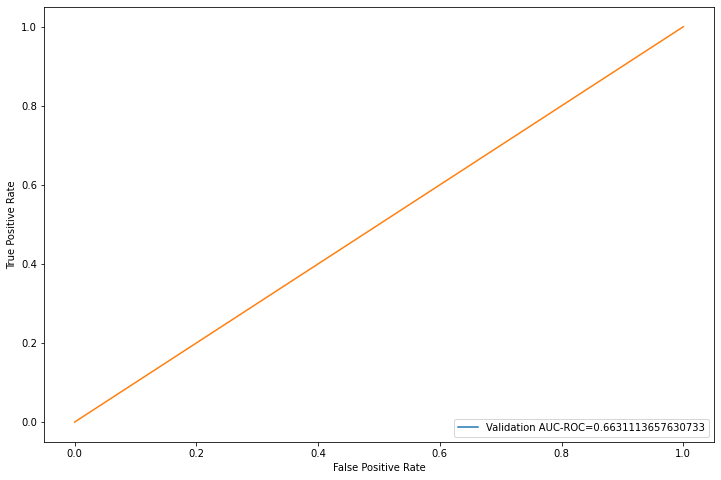

In [124]:
from sklearn.metrics import roc_curve
fpr, tpr, _= roc_curve(ytest,pred,pos_label=1) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 

x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [184]:
a=np.array([-0.070378,-0.137427,-0.139017,-0.141953,3135,0,0,1,0])
k=a.reshape(1,-1)
pred_val = model.predict(k)
int(pred_val)

0

In [160]:
xtest.columns

Index(['current_month_debit_y', 'previous_month_debit_y', 'current_balance_y',
       'previous_month_end_balance_y', 'vintage', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed',
       'occupation_student'],
      dtype='object')

In [162]:
xtest.head(2)

,current_month_debit_y,previous_month_debit_y,current_balance_y,previous_month_end_balance_y,vintage,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
20644,-0.070374,-0.13742,0.006849,0.004151,805,0,0,1,0
15444,-0.068854,-0.06702,-0.118085,-0.152286,1164,0,1,0,0


In [159]:
pred_val

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

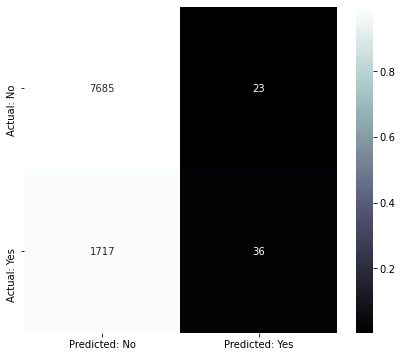

In [116]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [154]:
score = model.score(xtest, ytest)
score

0.8160870943874855

In [133]:
baseline_cols

['current_month_debit_y',
 'previous_month_debit_y',
 'current_balance_y',
 'previous_month_end_balance_y',
 'vintage',
 'occupation_retired',
 'occupation_salaried',
 'occupation_self_employed',
 'occupation_student']

Now let us try using all columns available to check if we get significant improvement.

There is some improvement in both ROC AUC Scores and Precision/Recall Scores.

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
model2 = RandomForestClassifier()
model2.fit(xtrain,ytrain)
pred2 = model2.predict_proba(xtest)[:,1]

In [150]:
# Confusion Matrix
pred_val2 = model2.predict(xtest)

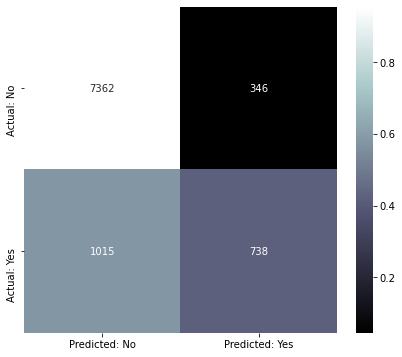

In [152]:
label_preds2 = pred_val2

cm2 = confusion_matrix(ytest,label_preds2)


def plot_confusion_matrix(cm2, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm2
    if normalized:
        norm_cm = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm2, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm2, ['No', 'Yes'])

In [153]:
score2 = model2.score(xtest, ytest)
score2

0.8561462847479124